In [4]:
def mythreshold(img2thr,thrmethod, thrparam):
    
     #adaptive param??
    
    if thrmethod=='canny':
        #requires 3 param , eg: thrparam=(120,255,0)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg = cv2.Canny(img2thr_grey, thrparam[0], thrparam[1], thrparam[2])
    elif thrmethod=='simple':
        #requires 2 param , eg: thrparam=(127,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],cv2.THRESH_BINARY)
        #also cv2.THRESH_BINARY_INV , cv2.THRESH_TRUNC , cv2.THRESH_TOZERO , cv2.THRESH_TOZERO_INV
    elif thrmethod=='otsu':
        #requires 2 param , eg: thrparam=(0,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],
                                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif thrmethod=='adaptive':
        # requires 3 param , eg: thrparam=(255,11,2)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg=cv2.adaptiveThreshold(img2thr_grey,thrparam[0], cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY,thrparam[1], thrparam[2])
        #also cv2.ADAPTIVE_THRESH_GAUSSIAN_C , same parameters
    elif thrmethod=='killcolor':
        #requires 2 param (vectorial) , eg: thrcol_low=(50,50,50) , thrcol_high=(255,255,255)
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5]) #color window
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV) #hsv 
        thrmask = cv2.bitwise_not(cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high))
        thrdimg = thrmask# for the mask #cv2.bitwise_and(img2thr,img2thr, mask=thrmask) #for the masked image
    elif thrmethod=='letcolor':
        #requires 2 param (vectorial) ,
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5])
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV)
        thrmask = cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high)
        thrdimg = thrmask#cv2.bitwise_and(img2thr,img2thr, mask=thrmask)
    #else: print('not binarized!')
    return thrdimg

## switch, elif, dictionaris: which one to use?
#https://www.pydanny.com/why-doesnt-python-have-switch-case.html
#https://stackoverflow.com/questions/60208/replacements-for-switch-statement-in-python
## more efficient way to pass many parameters
#

In [5]:
def myfilter(fltgimg,fltmeth,fltparam):
    
    #adaptive kernel ??
    
    if fltmeth=='gaussian':
        #3param eg: fltparam=(21,21,0)
        filtdimg=cv2.GaussianBlur(fltgimg, (fltparam[0],fltparam[1]),fltparam[2])
    elif fltmeth=='bilateral':
        #3param eg: fltparam=(21,51,51)
        filtdimg=cv2.bilateralFilter(fltgimg,fltparam[0],fltparam[1],fltparam[2])
    #elif fltmeth=='mean':
        #
    elif fltmeth=='median':
        #1param eg: fltparam=(21)
        filtdimg=cv2.medianBlur(img, fltparam[0])
    #else: print('not filtered')
    return filtdimg

#https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html


In [6]:
def mymorph(mrpimg,mrpmeth,mrpparam):
# requires 4 param ie: mrpparam=(kern_sizex,kern_sizey,numbiter_erode, numbiter_dilate)    
    #adaptive kernel??
    
    
    #if mrpmeth!=0:
        #if mrphparam[0]!=0
    mrpkernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( mrpparam[0], mrpparam[1] ) )
        #else: morphkernel=cv2.getStructuringElement( cv2.MORPH_RECT, (7,7))
    if mrpmeth=='close':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_CLOSE, mrpkernel )
    elif mrpmeth=='open':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_OPEN, mrpkernel )    
    elif mrpmeth=='erode':
        mrpdimg = cv2.erode(mrpdimg,mrpkernel,iterations = mrpparam[2])
    elif mrpmeth=='dilate':
        mrpdimg = cv2.dilate(mrpdimg,mrpkernel,iterations = mrpparam[3])
    #else: print('not morphed')
        
    return mrpdimg

In [7]:
def box_rectangles(imgrect,filtype,filtparam,threshtype,threshparam,morphtype,morphparam):
    #imgcls={1,0} toggles closing operation
    #debug = 0
 
    #do grayscaling need to be performed before filtering?
    
    #if filtype!=0:
    imgrect=myfilter(imgrect,filtype,filtparam)
        
    imgrect=mythreshold(imgrect, threshtype,threshparam)
    
    imgrect=mymorph(imgrect,morphtype,morphparam)
    
    #======== Find contours in image ========
       
    _,contours, hierarchy = cv2.findContours(imgrect, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if 1:
        # Identify rectangular contours
        rect_cnts = []
        areas = []
        for cnt in contours:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.1 * peri, True)
            (x, y, w, h) = cv2.boundingRect(cnt)
            #ar = w / float(h)
            if len(approx) == 4: # shape filtering condition
                # Get the area of the rectangle, need to exclude rectangles with area less than the 
                # one of the smallest aruco
                area = cv2.contourArea(cnt)
                #rect_cnts.append(cnt)
                #areas.append(cv2.contourArea(cnt))

                # Exclude rectangles with pixel area, due to some threesholding error perhaps
                if area >= 5.0:
                    areas.append(area)
                    rect_cnts.append(cnt) # Shape is rectangle, add to the valid list
        # Now in rect_cnts[] we have only rectangular contours


        #======== Discard the contours that do not contain any aruco (multiple markers can be present in the image)

        #  j = 0
        #  in_cnt = []
        #  for aruco_n, corner_n in zip(idsR, cornersR): # for every aruco marker in image...
        #      cnt_father = []
        #      corner_n = corner_n[0] # adjust array dimensionality
        #      for cnt in rect_cnts: # for every rectangular contour...
        #         dist = cv2.pointPolygonTest(cnt, (corner_n[0][0].astype(int), corner_n[0][1].astype(int)), True) # Check if top left corner of the aruco
        #          if dist > 1.: # if the aruco is inside the contour...
        #             cnt_father.append(cnt) # add the contour in list
        #              if debug:
        #                 cv2.drawContours(imgRectDraw, [cnt], -1, (0,255,0), 2) # for debug draw the contour found
        #     if len(cnt_father) != 0:
        #         in_cnt.append(cnt_father) # check next aruco

        #if debug:
            #cv2.imshow('Aruco Containers', imgRectDraw)

        #   plt.figure(figsize=(20,10))

        #   plt.subplot(1,2,1)
        #   plt.imshow(cv2.cvtColor(imgRect, cv2.COLOR_BGR2RGB))
        #   plt.title("Original image")

        #   plt.subplot(1,2,2)
        #   plt.imshow(cv2.cvtColor(imgRectDraw, cv2.COLOR_BGR2RGB))
        #   plt.title("Aruco containers")
        #  plt.show()

        #cv2.drawContours(imgrect, rect_cnts, -1, (0,255,0), 3)

        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return rect_cnts
    else:
        return contours

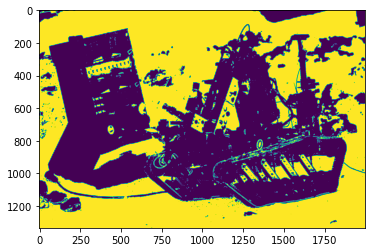

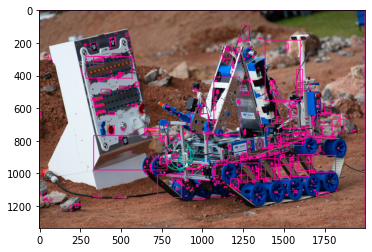

In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
image = cv2.cvtColor(cv2.imread("body/task-example.jpg"), cv2.COLOR_BGR2RGB)
cannyparam=(120,255,0)
simpleparam=(127,255)
otsuparam=(0,255)
adaptiveparam=(255,11,2)
colorparam=(50,50,50,255,255,255)
drawcolor=(255,0,150)
drawthickness=3
threshimg = mythreshold(image,'letcolor',colorparam)
plt.imshow(threshimg)
plt.show()
#histthrd,_ = np.histogram(threshimg,256,[0,256])
#plt.plot(histthrd)
#plt.show()

cnts = cv2.findContours(threshimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#implement the better funtion to pick cnts wrt py version
#cnts=imutils.xyz(cnts)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
if 1:
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w,y+h), drawcolor, drawthickness)
        # "WORKING"
else:
    for c in cnts:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,drawcolor,drawthickness)
        
plt.imshow(image)
plt.show()